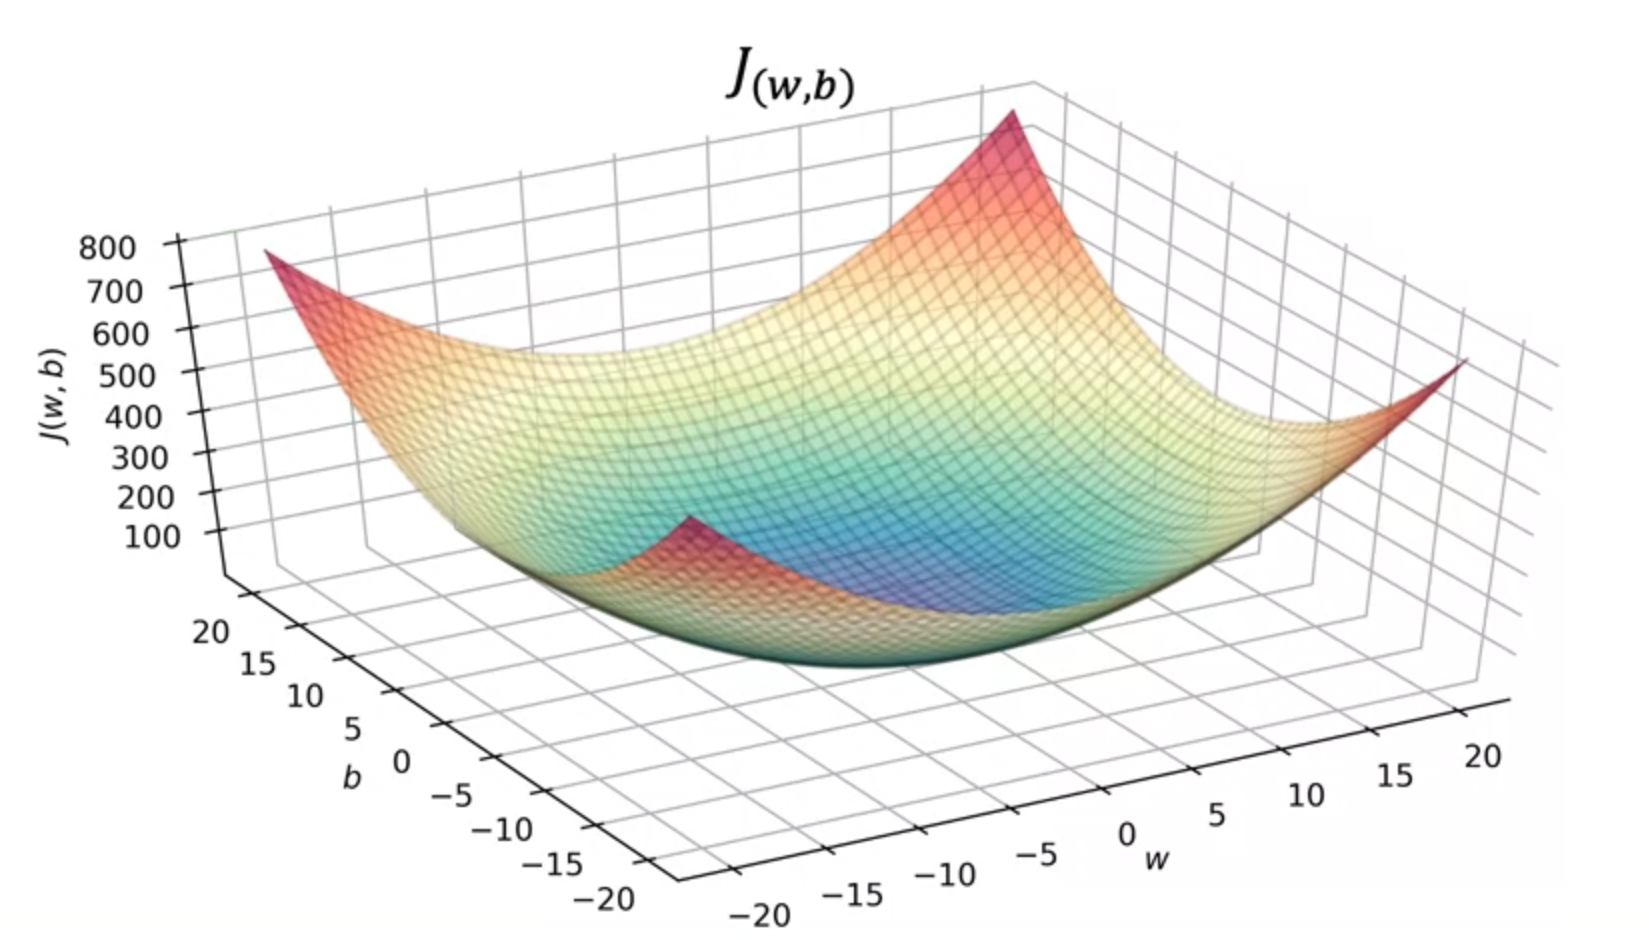

# 3d plots

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z3 = (Z1 - Z2) * 2
Z4 = np.sin(X*2) + np.cos(Y*2)

Z = Z1

ax = plt.figure().add_subplot(projection='3d')
CS = ax.plot_surface(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
plt.show()

In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("housing.csv")
df['price'] /= 1000 

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 

    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

#Useful linearspaces to give values to the parameters w and b
w = np.linspace(-0.5, 0.5, 100)
b = np.linspace(-1000, 1000, 100)

z=np.zeros((len(w), len(b)))
j=0
for w_choice in w:
    i=0
    for b_choice in b:
        z[i,j] = compute_cost(df['sqft'], df['price'], w_choice, b_choice)
        i+=1
    j+=1

#Meshgrid used for plotting 3D functions
W, B = np.meshgrid(w, b)

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(W, B, z)
plt.show()  # Z axis labels are scaled 

In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(W, B, z, [1000,5000,10000,25000,50000,100000,250000,500000,1000000])
ax.clabel(CS, inline=True, fontsize=10)
plt.show()

In [ ]:
z[0][0]
